# Understanding Descriptive Statistics

Import the necessary libraries here:

In [86]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def diceroll(k, n, dice_sides=6):  ##the number of dice k and the number of times to roll the dice n
    
    counter = {i : 0 for i in range(k, k*dice_sides + 1)} ## prepare dictionary with zero values for all possible results

    
    return counter
diceroll(k=1, n=10)



{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [88]:
# your code here
import random

def diceroll(k, n, dice_sides=6):  ##the number of dice k and the number of times to roll the dice n
    
    
    counter = {i : 0 for i in range(k, k*dice_sides + 1)} ## prepare dictionary with zero values for all possible results

    # roll all the dice
    for i in range(n):
        dice_sum = sum(random.choices(range(1, dice_sides + 1), k = k)) #choices()
        counter[dice_sum] += 1
    return counter
dice_dic=diceroll(k=1, n=10)

#dice_df=pd.DataFrame(dice_dic).transpose()# Ask?If using all scalar values, you must pass an index
dice_df=pd.DataFrame(dice_dic,index=['side']).transpose()
dice_df

TypeError: 'int' object is not callable

In [89]:
dice_df

,side
1,2
2,2
3,2
4,2
5,1
6,1


#### 2.- Plot the results sorted by value.

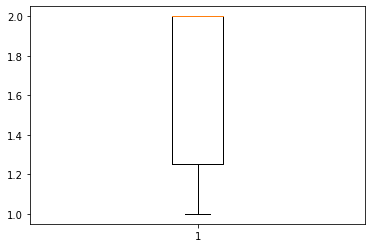

In [81]:
# your code here
dice_df1=dice_df.sort_values(by ="side")
plt.boxplot(dice_df1)
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [82]:
# your code here
dice_df1.value_counts()

side
2       4
1       2
dtype: int64

array([[<AxesSubplot:title={'center':'side'}>]], dtype=object)

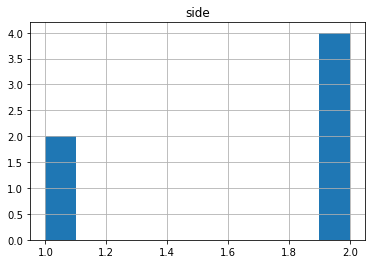

In [83]:
dice_df1.hist()

In [ ]:
"""
your comments here
.....(Histograms and box )Both plots are very similar in that they both help to visualize and describe numeric data. Although (histograms)2nd plot is  better in determining the underlying distribution of the data.
In 2nd grapfh more data are concentrated in point (2),plotting histograms allows us to visualize nicely the distribution of our data
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [ ]:
# your code here
def mean_df(dice_df):
    sum=0
    for i in range(len(dice_df)):
        #print(round(i*100/(len(dice_df)-1),2),"\t",dice_df[len(dataset)-i-1])
        sum=sum+dice_df.iloc[i]
    return sum

mean_dice=mean_df(dice_df)/len(dice_df)
mean_dice

In [ ]:
#dice_df.mean()

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [74]:
dice_df_list=list(dice_df["side"])# convert to list
dice_df_list

[2, 2, 2, 2, 1, 1]

In [73]:
def freq(dice_df_list):
    d = {}
    for i in dice_df_list:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d
freq_df=freq(dice_df_list)
freq_df

{2: 4, 1: 2}

In [75]:
dice_df.value_counts()

side
2       4
1       2
dtype: int64

In [76]:
# your code here
sum=0
x = freq_df.values()
x
for i in x:
    sum = sum + i  
mean=sum/len(x)
mean

3.0

In [13]:
#np.mean(dice_df_list)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [14]:
# your code here
dice_df_list=list(dice_df["side"])
dice_df_list

[2, 2, 2, 2, 1, 1]

In [15]:
def median(dice_df_list):
    sorted_data =sorted(dice_df_list)

    data_len = len(sorted_data)
    middle = (data_len - 1) // 2  #//---floor division
    if middle % 2:
        return sorted_data[middle]
    else:
        return (sorted_data[middle] + sorted_data[middle + 1]) / 2.0
    
median_df=median(dice_df_list)
median_df

2.0

In [16]:
sorted(dice_df_list)

[1, 1, 2, 2, 2, 2]

In [17]:
#median(dice_df_list)

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [18]:
# your code here


q1=1/4*(6+1)
print(q1)
#q2 = median_df

q3 =3/4*(6+1)
print(q3)
n=6
q2=q3-q1
print(q2)

1.75
5.25
3.5


In [19]:
#note:
#The Quartile Formula for Q1= ¼(n+1)th term
#The Quartile Formula for Q3= ¾(n+1)th term
#The Quartile Formula for Q2= Q3–Q1(Equivalent to Median)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [20]:
# your code here
data_dice=pd.read_csv("C:/Users/suparna/Ironhack_6_sep/week3/day3/Descriptive-Stats/data/roll_the_dice_hundred.csv",index_col=False)

In [21]:
data_dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [22]:
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop Unnamed Column After Importing Data
data_dice =data_dice.loc[:, ~data_dice.columns.str.contains('^Unnamed')]
data_dice

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [23]:
#Sort Rows of a Dataframe by a Column 
data_dice.sort_values(by="value",inplace=True,ignore_index=True)#To change the index of the rows by refreshing the index, you can set the ignore_index parameter to True.

print(data_dice)

    roll  value
0      0      1
1     47      1
2     56      1
3      9      1
4     73      1
..   ...    ...
95    17      6
96    11      6
97    24      6
98    21      6
99    99      6

[100 rows x 2 columns]


C:\software-da\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:>

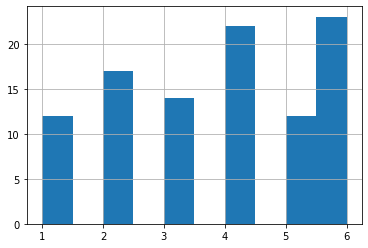

In [24]:
data_dice["value"].hist()

In [25]:
data_dice["value"].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

<AxesSubplot:>

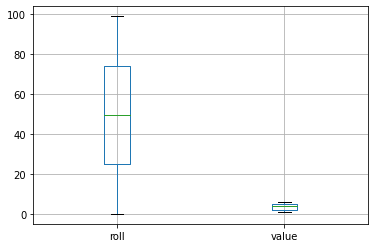

In [26]:
data_dice.boxplot()

In [27]:
"""
your comments here
very tiny box plot, means 50% of values are very similar.
"""

'\nyour comments here\nvery tiny box plot, means 50% of values are very similar.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [28]:
# your code here
def mean_df(data_dice):
    sum=0
    for i in range(len(data_dice)):
        #print(round(i*100/(len(dice_df)-1),2),"\t",dice_df[len(dataset)-i-1])
        sum=sum+data_dice.iloc[i]
    return sum

mean_dice=mean_df(data_dice["value"])/len(data_dice)
mean_dice

3.74

#### 3.- Now, calculate the frequency distribution.


In [29]:
# your code here
data_dice["value"].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:>

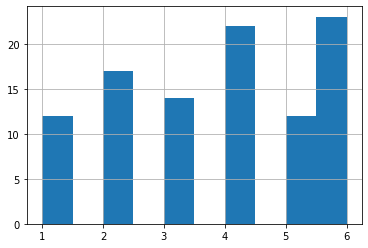

In [30]:
# your code here
data_dice["value"].hist()

In [31]:
"""
your comments here
not symettric distributed.
so, mean amd median is not same.Mean and median not accurately measure the centre of the distribution.
"""

'\nyour comments here\nnot symettric distributed.\nso, mean amd median is not same.Mean and median not accurately measure the centre of the distribution.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [33]:
# your code here
data_dice1=pd.read_csv("C:/Users/suparna/Ironhack_6_sep/week3/day3/Descriptive-Stats/data/roll_the_dice_thousand.csv",index_col=False)

In [34]:
data_dice1["value"].mean()

3.447

In [37]:
data_dice1["value"].median()

3.0

In [35]:
data_dice1["value"].value_counts()

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

<AxesSubplot:>

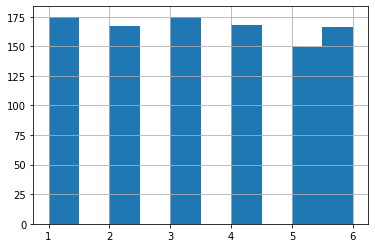

In [36]:
data_dice1["value"].hist()

In [ ]:
"""
your comments here
not symettric distributed.
so, mean amd median is not same.Mean and median not accurately measure the centre of the distribution.
positively skewed
""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [39]:
# your code here
data_age=pd.read_csv("C:/Users/suparna/Ironhack_6_sep/week3/day3/Descriptive-Stats/data/ages_population.csv")
data_age

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [40]:
data_age["observation"].value_counts()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: observation, Length: 72, dtype: int64

<AxesSubplot:>

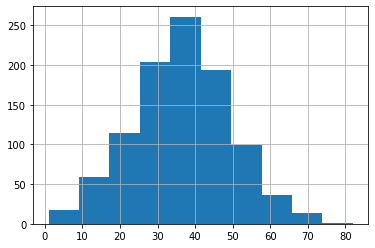

In [41]:
data_age["observation"].hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [44]:
# your code here
data_age["observation"].mean()

36.56

In [45]:
data_age["observation"].std()

12.816499625976762

In [ ]:
"""
your comments here
Yes,they fall inside the ranges you guessed.Because ,its amormal distribution and its clearly showm in distribution.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [46]:
# your code here
data_age2=pd.read_csv("C:/Users/suparna/Ironhack_6_sep/week3/day3/Descriptive-Stats/data/ages_population2.csv")
data_age2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [48]:
data_age2["observation"].value_counts()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
19.0      3
35.0      3
36.0      2
Name: observation, dtype: int64

<AxesSubplot:>

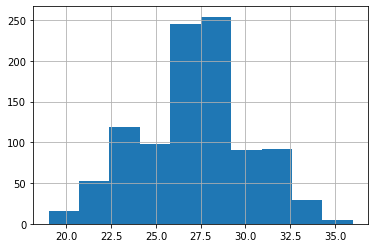

In [49]:
data_age2["observation"].hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
Yes, they are different than step1.
Its not symetrical distribution.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [51]:
# your code here
data_age2["observation"].mean()

27.155

In [50]:
data_age2["observation"].std()

2.969813932689186

In [ ]:
"""
your comments here
Its diff from step2. Here std is low.data points are less deviate from mean.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [60]:
# your code here
data_age3=pd.read_csv("C:/Users/suparna/Ironhack_6_sep/week3/day3/Descriptive-Stats/data/ages_population3.csv")
data_age3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [61]:
data_age3["observation"].value_counts()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

<AxesSubplot:>

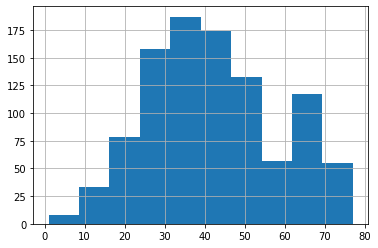

In [62]:
data_age3["observation"].hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [58]:
# your code here
data_age3["observation"].mean()

41.989

In [59]:
data_age3["observation"].std()

16.144705959865934

In [ ]:
"""
your comments here
mean is shifting to right(getting bigger)and std also high compare to step1
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [63]:
# your code here
q1 = np.quantile(data_age3, 0.25)#, interpolation='midpoint')
print("the first quartile is", q1)
q2 = np.quantile(data_age3, 0.50)
print("the second quartile is",q2)
q3 = np.quantile(data_age3, 0.75)
print("the third quartile is", q3)


the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0


In [ ]:
"""
your comments here
Its pisitively skewed distribution.
q2=median(40)
difference between the median and the mean is (41.989-40)

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [66]:
dataset=list(data_age3["observation"])

In [67]:
# your code here
#capture percentile of data
for i in range(len(dataset)):
  print(round(i*100/(len(dataset)-1),2),"\t", dataset[len(dataset)-i-1])

0.0 	 43.0
0.1 	 35.0
0.2 	 30.0
0.3 	 55.0
0.4 	 16.0
0.5 	 37.0
0.6 	 48.0
0.7 	 26.0
0.8 	 70.0
0.9 	 29.0
1.0 	 67.0
1.1 	 32.0
1.2 	 28.0
1.3 	 43.0
1.4 	 25.0
1.5 	 49.0
1.6 	 38.0
1.7 	 39.0
1.8 	 53.0
1.9 	 16.0
2.0 	 69.0
2.1 	 45.0
2.2 	 20.0
2.3 	 72.0
2.4 	 49.0
2.5 	 35.0
2.6 	 55.0
2.7 	 46.0
2.8 	 33.0
2.9 	 28.0
3.0 	 29.0
3.1 	 67.0
3.2 	 37.0
3.3 	 46.0
3.4 	 14.0
3.5 	 15.0
3.6 	 21.0
3.7 	 55.0
3.8 	 36.0
3.9 	 27.0
4.0 	 23.0
4.1 	 70.0
4.2 	 19.0
4.3 	 29.0
4.4 	 29.0
4.5 	 27.0
4.6 	 7.0
4.7 	 26.0
4.8 	 40.0
4.9 	 32.0
5.01 	 41.0
5.11 	 33.0
5.21 	 16.0
5.31 	 70.0
5.41 	 59.0
5.51 	 16.0
5.61 	 24.0
5.71 	 17.0
5.81 	 50.0
5.91 	 50.0
6.01 	 68.0
6.11 	 63.0
6.21 	 77.0
6.31 	 29.0
6.41 	 66.0
6.51 	 55.0
6.61 	 41.0
6.71 	 33.0
6.81 	 36.0
6.91 	 66.0
7.01 	 59.0
7.11 	 47.0
7.21 	 34.0
7.31 	 70.0
7.41 	 39.0
7.51 	 2.0
7.61 	 56.0
7.71 	 39.0
7.81 	 74.0
7.91 	 39.0
8.01 	 36.0
8.11 	 64.0
8.21 	 38.0
8.31 	 43.0
8.41 	 47.0
8.51 	 27.0
8.61 	 30.0
8.71 	 2

99.8 	 24.0
99.9 	 21.0
100.0 	 21.0


In [ ]:
"""
your comments here
I did not see any difference
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""